Last modified April 28, 2021 by Luis Valdivia

In [55]:
import math
import matplotlib.pyplot as plt 
from astropy.table import QTable, Table, Column
from astropy import units as u
import numpy as np

# 1.
# a.
We rewrite the ODE as $u' -\frac{u}{t} = 1$ and multiply by the integrating factor $e^{-\int \frac{1}{t}} = e^{-\ln t} = -\frac1t$ to get $\frac{-u'}{t} + \frac{u}{t^2} = -\frac1t$. We integrate both sides with respect to $t$, noting that $\frac{-u'}{t} + \frac{u}{t^2} = \frac{d}{dt}(\frac{-u}{t})$, so we have

$$\int \frac{-u'}{t} + \frac{u}{t^2} dt = \int -\frac1t dt,$$
$$\int \frac{d}{dt}\bigg(\frac{-u}{t}\bigg) dt = \int -\frac1t dt,$$
$$\frac{-u}{t} = -\ln t + C,$$
$$u(t) = t\ln t + Ct.$$

Now we consider the initial condition, that $u(1)=2$. This means that $$2 = u(1) = \ln 1 + C,$$ which implies $C=2$. Thus, the exact solution to the IVP is 

$$u(t) = t\ln t + 2t.$$


# b. 

We start by defining the function we will be working with in this problem. Recall that we have $u'(t) = 1 + \frac{u}{t}$.

In [56]:
# INPUT: u and t
# OUTPUT: u'(t)

def f1(t,u):
    return (1 + (u/t))

Then we write code for the classical 4th order Runge Kutta method, note that we want to return an array including the intermediate values.

In [57]:
# INPUT: t_0 as a, t_N as b, interval length as h,
#        y = u(t_0), and f as the relevant function 
# OUTPUT: array of equispaced approximates 
#        from u(a) to u(b)

def rk(a, b, h, y, f):
    yarr = []
    yarr.append(y)
    for i in range(int((b-a)/h)):
        k1 = f(a, y)
        k2 = f(a + h/2, y + (h*k1/2))
        k3 = f(a + h/2, y + (h*k2/2))
        k4 = f(a + h, y + (h*k3))
        y += h*(k1 + 2*k2 + 2*k3 + k4)/6
        yarr.append(y)
        a += h
    return yarr

Now we compute the $e_k$ values and store them.

In [58]:
karr = [0.2, 0.1, 0.05, 0.025]
ekarr = []
for k in karr:
    runge = rk(1,2,k,2,f1)
    a = 1
    max = 0
    for j in range(int(1/k)+1):
        curr = (abs(runge[j] - a*math.log(a) - 2 * a))
        if curr > max:
            max = curr
        a += k
    ekarr.append(max)

Lastly we make a table to show the results.

In [59]:
data = [karr, ekarr]
Table(data, names = ('k', 'e_k'))

k,e_k
float64,float64
0.2,2.2025877904230384e-05
0.1,1.4747674339510297e-06
0.05,9.501746456308524e-08
0.025,6.022803589189607e-09


# c. 
Now we do the same thing with the second-order Runge-Kutta method.

In [60]:
# INPUT: t_0 as a, t_N as b, interval length as h,
#        y = u(t_0), and f as the relevant function 
# OUTPUT: array of equispaced approximates 
#        from u(a) to u(b)

def rk2(a, b, h, y, f):
    yarr = []
    yarr.append(y)
    for i in range(int((b-a)/h)):
        k1 = f(a, y)
        k2 = f(a + h, y + (h*k1))
        y += h*(k1 + k2)/2
        yarr.append(y)
        a += h
    return yarr

Now we compute the $e_k$ values and store them.

In [61]:
karr2 = [0.2, 0.1, 0.05, 0.025]
ekarr2 = []
for k in karr2:
    runge = rk2(1,2,k,2,f1)
    a = 1
    max = 0
    for j in range(int(1/k)+1):
        curr = (abs(runge[j] - a*math.log(a) - 2 * a))
        if curr > max:
            max = curr
        a += k
    ekarr2.append(max)

Lastly we make a table to show the results.

In [62]:
data2 = [karr2, ekarr2]
Table(data2, names = ('k', 'e_k'))

k,e_k
float64,float64
0.2,0.008867899794618328
0.1,0.002356042022554572
0.05,0.0006068784405939276
0.025,0.0001539777709655965


# 2.

We wrtie code for computing the array of the approximated values at each step.

In [63]:
# INPUT: t_0 as a, t_N as b, interval length as h,
#        y = u(t_0)
# OUTPUT: array of equispaced approximates 
#        from u(a) to u(b)

def ivp(a, b, h, y):
    yarr = []
    yarr.append(y)
    yarr.append(math.exp(h))
    for i in range(2, int((b-a)/h)+1):
        yarr.append(-yarr[i-2]/2 + 3*yarr[i-1]/2 + h*(5*yarr[i-1]/4 - 3*yarr[i-2]/4))
    return yarr

Then we store that array, along with another array for the $x$-values and graph it along with the exact solution.

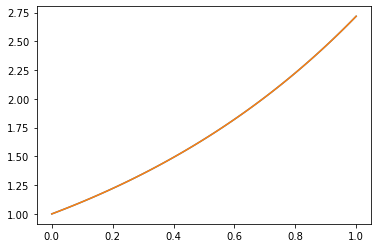

In [64]:
y1 = ivp(0, 1, 0.01, 1)
x = []
exact = []
for i in range(101):
    x.append(0.01*i)
    exact.append(math.exp(0.01*i))

plt.plot(x, y1)
plt.plot(x, exact)

Note that the graphs are so close that they're visually hard to distinguish from each other.

# b.

In [65]:
# INPUT: t_0 as a, t_N as b, interval length as h,
#        y = u(t_0), and f as the relevant function 
# OUTPUT: array of equispaced approximates 
#        from u(a) to u(b)

def ivp2(a, b, h, y):
    yarr = []
    yarr.append(y)
    yarr.append(math.exp(h))
    for i in range(2, int((b-a)/h)+1):
        yarr.append(-2*yarr[i-2] + 3*yarr[i-1] + h*(yarr[i-1]/2 - 3*yarr[i-2]/2))
    return yarr

Then we store that array and graph it along with the exact solution.

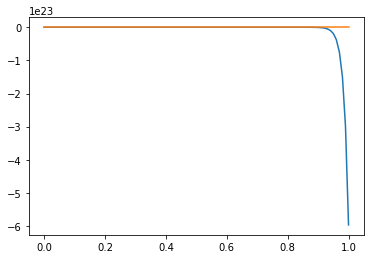

In [66]:
y2 = ivp2(0, 1, 0.01, 1)

plt.plot(x, y2)
plt.plot(x, exact)

# c. 

The graph in part a is very close to the exact solution, it converges, whereas that in part b diverges. We can explain this using zero-stability. They are clearly LMM. First, we show that each method is consistent. The corresponding characteristic polynomials for each(denoted by subscripts referring to their part) are $\rho_a(z) = z^2 -\frac32 z +\frac12$, $ \rho_b(z) = z^2 -3 z + 2$, $ \sigma_a(z) = -\frac34 z + \frac54 z^2$, $ \sigma_b(z) = -\frac32 z + \frac12 z^2$. We check that $\rho_a(1) = 0$ and $\rho_b(1) = 0$. We compute

$$\rho_a(1) = 1 -\frac32  +\frac12 = 0,$$
$$\rho_b(1) = 1 -3 + 2 = 0.$$

Then we need to check that $\rho'(1) = \sigma(1)$. So we compute

$$\rho'_a(1) = 2\cdot 1 -\frac32  = \frac12,$$
$$\sigma_a(1) = -\frac34 + \frac54 = \frac12,$$
$$\rho'_b(1) = 2\cdot 1 - 3 = -1,$$
$$\sigma_b(1) = -\frac32 + \frac12 = -1.$$

Thus, both methods are consistent. Now we look at the roots of the $\rho$ polynomials. The roots of $\rho_a$ are $\frac12$ and 1, meaning that this method is zero-stable. By the Dahlquist Theorem, a consistent LMM that is zero-stable is convergent, so that is why the method in part a converges.

Meanwhile, the roots of $\rho_b$ are 1 and 2. Notice that one of the roots is strictly greater than 1, meaning that this method is not zero-stable. By the contrapositive of the Dahlquist Theorem, a consistent LMM that is not zero-stable is not convergent, so that is why the method in part b diverges.